In [1]:
import os
import numpy as np
import pandas as pd
import zipfile
import gzip
import shutil
import glob
from bs4 import BeautifulSoup
import requests
import dateutil.parser
from datetime import date

from datetime import datetime

In [3]:
path = os.path.dirname("D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//2020//")
path1 = os.path.dirname("D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020//")
if not os.path.exists(path1):
    os.mkdir(path1)

In [3]:
## Merging all data into a single folder

In [4]:
#  for root,dirs,files in os.walk(path):  
#     for filenames in files:
#         if filenames.endswith(".gz"):
#             with gzip.open(root + "//" + filenames , 'rb') as f_in:
# #                 with open(root + "//" + filenames.split(".")[0] + ".csv", 'wb') as f_out:
# #                     shutil.copyfileobj(f_in, f_out)
#                 with open(path1 + "//" + filenames.split(".")[0] + ".csv", 'wb') as f_out_all:
#                     shutil.copyfileobj(f_in, f_out_all)
#         else:
#             print("Not a Gzip file")

In [7]:
# get data file names
path = os.path.dirname("D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020//")
filenames = glob.glob(path + "//*.csv")
file_names = [f for f in filenames ]
# combined_csv = pd.concat([pd.read_csv(f) for f in filenames ])
# combined_csv.to_csv( "combined_csv.csv", index=False)    

In [6]:
## Scraping Fipcodes 

In [7]:
# result = requests.get("https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697")
# src = result.content
# soup = BeautifulSoup(src, 'lxml')
# table = soup.find("table", {"class" : "data"})
# table_body = table.find('tbody')
# rows = table_body.find_all('tr')

In [8]:
# fip_data = []
# for row in rows:
#     cols = row.find_all('td')
#     cols = [ele.text.strip() for ele in cols]
#     fip_data.append([ele for ele in cols if ele]) 

In [9]:
# dfObj = pd.DataFrame(data[1:])
# dfObj.columns = ['fipcode','county','state']

In [10]:
# dfObj.to_csv("fipcodes/fipcodes-to-county.csv")

In [9]:
fipcodes_data = pd.read_csv("fipcodes/fipcodes-to-county.csv")

In [10]:
fip_to_data = fipcodes_data.drop("Unnamed: 0", axis=1)

In [11]:
fip_to_data["fipcode"] = fip_to_data["fipcode"].astype('str')

In [14]:
## Scraping unemployment data

In [15]:
# result = requests.get("https://www.nbcnews.com/business/economy/unemployment-claims-state-see-how-covid-19-has-destroyed-job-n1183686")
# src = result.content
# soup = BeautifulSoup(open("unemployment.html"))
# table = soup.find("table")
# table_body = table.find('tbody')
# rows = table_body.find_all('tr')

In [16]:
# unemployment_data = []
# for row in rows:
#     cols = row.find_all('td')
#     cols = [ele.text.strip() for ele in cols]
#     unemployment_data.append([ele for ele in cols if ele]) 

In [17]:
# unemployment_data = pd.DataFrame(unemployment_data)
# unemployment_data.columns = ['state','claims','percent of state labour force']
# unemployment_data.to_csv("unemployment_data.csv")

In [18]:
# unemployment_data = pd.read_csv("unemployment/unemployment_data.csv")
# unemployment_data = unemployment_data.drop("Unnamed: 0", axis=1)

In [12]:
abbr_name = pd.read_csv("abbr-name.csv")

In [20]:
# abbrs = []
# for index, record in unemployment_data.iterrows():
#     abbrs.append(abbr_name[abbr_name["state"] == record["state"]]["abbr"].values[0])
   
# unemployment_data.insert(2,'abbr', abbrs)
# unemployment_data.to_csv('unemployment/unemployment_data.csv')


In [13]:
unemployment_data = pd.read_csv('unemployment/unemployment_data.csv')
unemployment_data = unemployment_data.drop("Unnamed: 0", axis=1)

In [22]:
#Scraping stay at home orders

In [23]:
# result = requests.get("https://www.littler.com/publication-press/publication/stay-top-stay-home-list-statewide")
# src = result.content
# soup = BeautifulSoup(src, 'lxml')
# table = soup.find("table")
# table_body = table.find('tbody')
# rows = table_body.find_all('tr')

In [24]:
# stay_at_home = []
# for row in rows:
#     cols = row.find_all('td')
#     cols = [ele.text.strip() for ele in cols]
#     stay_at_home.append([ele for ele in cols if ele]) 

In [25]:
# stay_at_home = pd.DataFrame(stay_at_home[1:])
# stay_at_home.columns = ['state','start_date','end_date', "source"]
# stay_at_home = stay_at_home.drop("source", axis=1)

In [26]:
# list =[ item[0] for item in stay_at_home["start_date"].str.split("at").values]

In [27]:
# stay_at_home['start_date'] = pd.to_datetime(list,utc=True)
# stay_at_home['start_date'] = stay_at_home['start_date'].dt.date

In [28]:
# dates = []
# length = 2 
# for i in stay_at_home["end_date"].str.split("\n").str[0]:
#     try: 
#         date = parse(i)
#         date = str(date.year) + "-" + str(format(date.month, "02")) + "-" + str(format(date.day, "02"))
#         dates.append(date)
#     except:
#         dates.append(0)
# stay_at_home["open_date"] = dates

In [29]:
# stay_at_home.to_csv("stay-at-home/stay_at_home.csv")

In [30]:
# stay_at_home = pd.read_csv("stay-at-home/stay_at_home.csv")
# stay_at_home = stay_at_home.drop("Unnamed: 0", axis=1)

In [31]:
# abbrs = []
# for index, record in stay_at_home.iterrows():
#     abbrs.append(abbr_name[abbr_name["state"] == record["state"]]["abbr"].values[0])
    
   
# stay_at_home.insert(2,'abbr', abbrs)
# stay_at_home.to_csv('stay-at-home/stay_at_home_abbr.csv')

In [32]:
## Manual processing is done for few states as they don't have exact dates

In [14]:
stay_at_home = pd.read_csv('stay-at-home/stay_at_home_abbr.csv')
stay_at_home = stay_at_home.drop("Unnamed: 0", axis=1)

In [34]:
# Processing Schools data

In [35]:
# school_closing_list = pd.read_csv("school_closures/schools_closures_list.csv")
# school_closing_list.drop(["District NCES","School NCES"], axis=1, inplace=True)
# school_closing_list.drop_duplicates(subset ="State",inplace = True) 

In [36]:
# school_closing_list.to_csv("school_closures/school_closures_statewise.csv")

In [37]:
# school_closing_list =  pd.read_csv("school_closures/school_closures_statewise.csv")

In [38]:
# school_closing_list = school_closing_list.drop("Unnamed: 0", axis=1)

In [39]:
# school_closing_list["Physical Closed Date"] = school_closing_list["Physical Closed Date"].str.replace("/", "-")
# school_closing_list["Physical Closed Date"] = school_closing_list["Physical Closed Date"].apply(lambda x: school_closing_list["Physical Closed Date"].mode().values[0] if pd.isnull(x) else x)
# school_closing_list["Physical Closed Date"] = pd.to_datetime(school_closing_list["Physical Closed Date"]).dt.strftime('%Y-%m-%d')

In [40]:
# school_closing_list["Instructional Reopen Date"] = school_closing_list["Instructional Reopen Date"].str.replace("/", "-")
# school_closing_list["Instructional Reopen Date"] = school_closing_list["Instructional Reopen Date"].apply(lambda x: school_closing_list["Instructional Reopen Date"].mode().values[0] if pd.isnull(x) else x)
# school_closing_list["Instructional Reopen Date"] = pd.to_datetime(school_closing_list["Instructional Reopen Date"]).dt.strftime('%Y-%m-%d')
# school_closing_list.to_csv("school_closures/schools_closures_list_without_null.csv")

In [15]:
school_closing_list = pd.read_csv("school_closures/schools_closures_list_without_null.csv")
school_closing_list = school_closing_list.drop("Unnamed: 0", axis=1)

In [16]:
def fipcode_mapping(fip_to_data,data1):
    counties = []
    states = []
    for index,record in data1.iterrows():
    #     print(record["origin_census_block_group"])
        if(str(record["origin_census_block_group"])[:4] in fip_to_data["fipcode"].values):
            matched_record = fip_to_data[fip_to_data["fipcode"] == str(record["origin_census_block_group"])[:4]]
            counties.append(matched_record["county"].values[0])
            states.append(matched_record["state"].values[0])
        elif(str(record["origin_census_block_group"])[:5] in fip_to_data["fipcode"].values):
            matched_record = fip_to_data[fip_to_data["fipcode"] == str(record["origin_census_block_group"])[:5]]
            counties.append(matched_record["county"].values[0])
            states.append(matched_record["state"].values[0])
        else:
            states.append("unknown")
            counties.append("unknown")
    data1.insert(1, "county", counties)
    data1.insert(2, "state", states)
    return data1

In [17]:
preprocessed_2019 = pd.read_csv("2019_preprocessed.csv")

In [18]:
preprocessed_2019_weekday = pd.read_csv("2019_preprocessed_weekday.csv")

In [19]:
def get_2019_median(reset_data):
    distance_traveled_from_home = []
    median_home_dwell_time = []
    median_non_home_dwell_time = []
    median_percentage_time_home = []
    distance_traveled_from_home_2019 = []
    median_home_dwell_time_2019 = []
    median_non_home_dwell_time_2019 = []
    median_percentage_time_home_2019 = []
    for index, row in reset_data.iterrows():
        month = int(row["date_range_start"].strftime('%Y-%m-%d').split("-")[1].strip("0"))
        if([row["state"],month] in preprocessed_2019[["state", "month"]].values.tolist()):
            d = preprocessed_2019[(preprocessed_2019["state"] == row["state"]) &  (preprocessed_2019["month"] == month)]
#             print(row["distance_traveled_from_home"] )
#             print(d["distance_traveled_from_home"].values[0])
            distance_traveled_from_home.append(row["distance_traveled_from_home"] - d["distance_traveled_from_home"].values[0])
            distance_traveled_from_home_2019.append(d["distance_traveled_from_home"].values[0])
            median_home_dwell_time.append(row["median_home_dwell_time"] - d["median_home_dwell_time"].values[0])
            median_home_dwell_time_2019.append(d["median_home_dwell_time"].values[0])
            median_non_home_dwell_time.append(row["median_non_home_dwell_time"] - d["median_non_home_dwell_time"].values[0])
            median_non_home_dwell_time_2019.append(d["median_non_home_dwell_time"])
            median_percentage_time_home.append(row["median_percentage_time_home"] - d["median_percentage_time_home"].values[0])
            median_percentage_time_home_2019.append(d["median_percentage_time_home"].values[0])
        else:
            distance_traveled_from_home.append(0)
            median_home_dwell_time.append(0)
            median_non_home_dwell_time.append(0)
            median_percentage_time_home.append(0)

    reset_data["distance_traveled_from_home_diff"] = distance_traveled_from_home  
    reset_data["median_home_dwell_time_diff"] = median_home_dwell_time
    reset_data["median_non_home_dwell_time_diff"] = median_non_home_dwell_time
    reset_data["median_percentage_time_home_diff"] = median_percentage_time_home
    reset_data["distance_traveled_from_home_2019"] = distance_traveled_from_home_2019 
    reset_data["median_home_dwell_time_2019"] = median_home_dwell_time_2019
    reset_data["median_non_home_dwell_time_2019"] = median_non_home_dwell_time_2019
    reset_data["median_percentage_time_home_2019"] = median_percentage_time_home_2019
    return reset_data


In [20]:
from datetime import datetime
def data_grouping_statewise(data):
    final_data = data.groupby(['state','date_range_start']).mean()
    values = []
    unemployment_claims = []
    unemployment_percent_of_state_labour_force = []
    stay_home_orders = []
    for j in final_data.index:
#         print(j[0] in school_closing_list["State"].values)
#         print(j[1].strftime('%Y-%m-%d') in school_closing_list["Physical Closed Date"].values.tolist())
#         print(j[0])
#         print(j[1].strftime('%Y-%m-%d'))
#         print(type(school_closing_list[["State", "Physical Closed Date"]]))
#         print([j[0],j[1].strftime('%Y-%m-%d')])
#         print(school_closing_list[["State", "Physical Closed Date"]].values.tolist())
#         if([j[0],j[1].strftime('%Y-%m-%d')] in school_closing_list[["State", "Physical Closed Date"]].values.tolist()):
#             print("true")
#         else:
#             print("false")
#         if([j[0],j[1].strftime('%Y-%m-%d')] in stay_at_home[["abbr","start_date"]].values.tolist()):
#             print("true")
#         else:
#             print("false")
#         print([j[0],j[1].strftime('%Y-%m-%d')])
#         print(stay_at_home[["abbr","start_date"]].values.tolist())
        state_record = school_closing_list[school_closing_list["State"] == j[0]]
        if(not state_record.empty):
            date_format = "%Y-%m-%d"
            date_1 = datetime.strptime(state_record["Physical Closed Date"].values[0], date_format)
            date_2 = datetime.strptime(state_record["Instructional Reopen Date"].values[0], date_format)
            date_3 = datetime.strptime(j[1].strftime('%Y-%m-%d'), date_format)
            if(date_1 <= date_3 <= date_2):
                values.append(1)
            else:
                values.append(0)
        else:
            values.append(0)

        stay_at_home_record = stay_at_home[stay_at_home["abbr"] == j[0]]
        if(not stay_at_home_record.empty):
            date_4 = datetime.strptime(stay_at_home_record["start_date"].values[0], "%m/%d/%Y")
            date_5 = datetime.strptime(stay_at_home_record["open_date"].values[0], "%m/%d/%Y")
            date_6 = datetime.strptime(j[1].strftime('%Y-%m-%d'), "%Y-%m-%d")
            if(date_4 <= date_6 <= date_5):
                stay_home_orders.append(1)
            else:
                stay_home_orders.append(0)
        else:
            stay_home_orders.append(0)
                
#         if([j[0],j[1].strftime('%Y-%m-%d')] in school_closing_list[["State", "Physical Closed Date"]].values.tolist()):
#             values.append(1)
#         else:
#             values.append(0)
            
        if(j[0] in unemployment_data["abbr"].values):
            matched_record = unemployment_data[unemployment_data["abbr"] == j[0]]
            unemployment_claims.append(matched_record["claims"].values[0])
            unemployment_percent_of_state_labour_force.append(matched_record["percent of state labour force"].values[0])
        else:
            unemployment_claims.append(0)
            unemployment_percent_of_state_labour_force.append(0)
            
      
#         if([j[0],j[1].strftime('%Y-%m-%d')] in stay_at_home[["abbr","start_date"]].values.tolist()):
#             stay_home_orders.append(1)
#         else:
#             stay_home_orders.append(0)
#     if([j[0],j[1].split("-")[1]] in preprocessed_2019[["state", "month"]].values.tolist()):
    final_data.insert(2, "school_closure", values)
    final_data.insert(3, "unemployment_claims", unemployment_claims)
    final_data.insert(4, "percent_of_state_labour_force", unemployment_percent_of_state_labour_force)
    final_data.insert(5,  "stay_home_orders", stay_home_orders)
    return final_data

In [21]:
def get_2019_median(reset_data):
    distance_traveled_from_home = []
    median_home_dwell_time = []
    median_non_home_dwell_time = []
    median_percentage_time_home = []
    distance_traveled_from_home_2019 = []
    median_home_dwell_time_2019 = []
    median_non_home_dwell_time_2019 = []
    median_percentage_time_home_2019 = []
    for index, row in reset_data.iterrows():
        month = int(row["date_range_start"].strftime('%Y-%m-%d').split("-")[1].strip("0"))
        if([row["state"],month] in preprocessed_2019[["state", "month"]].values.tolist()):
            d = preprocessed_2019[(preprocessed_2019["state"] == row["state"]) &  (preprocessed_2019["month"] == month)]
#             print(row["distance_traveled_from_home"] )
#             print(d["distance_traveled_from_home"].values[0])
            distance_traveled_from_home.append(row["distance_traveled_from_home"] - d["distance_traveled_from_home"].values[0])
            distance_traveled_from_home_2019.append(d["distance_traveled_from_home"].values[0])
            median_home_dwell_time.append(row["median_home_dwell_time"] - d["median_home_dwell_time"].values[0])
            median_home_dwell_time_2019.append(d["median_home_dwell_time"].values[0])
            median_non_home_dwell_time.append(row["median_non_home_dwell_time"] - d["median_non_home_dwell_time"].values[0])
            median_non_home_dwell_time_2019.append(d["median_non_home_dwell_time"])
            median_percentage_time_home.append(row["median_percentage_time_home"] - d["median_percentage_time_home"].values[0])
            median_percentage_time_home_2019.append(d["median_percentage_time_home"].values[0])
        else:
            distance_traveled_from_home.append(0)
            median_home_dwell_time.append(0)
            median_non_home_dwell_time.append(0)
            median_percentage_time_home.append(0)

    reset_data["distance_traveled_from_home_diff"] = distance_traveled_from_home  
    reset_data["median_home_dwell_time_diff"] = median_home_dwell_time
    reset_data["median_non_home_dwell_time_diff"] = median_non_home_dwell_time
    reset_data["median_percentage_time_home_diff"] = median_percentage_time_home
    reset_data["distance_traveled_from_home_2019"] = distance_traveled_from_home_2019 
    reset_data["median_home_dwell_time_2019"] = median_home_dwell_time_2019
    reset_data["median_non_home_dwell_time_2019"] = median_non_home_dwell_time_2019
    reset_data["median_percentage_time_home_2019"] = median_percentage_time_home_2019
    return reset_data
        

In [22]:
def get_2019_median_weekday(reset_data):
    distance_traveled_from_home = []
    median_home_dwell_time = []
    median_non_home_dwell_time = []
    median_percentage_time_home = []
    distance_traveled_from_home_2019 = []
    median_home_dwell_time_2019 = []
    median_non_home_dwell_time_2019 = []
    median_percentage_time_home_2019 = []
    for index, row in reset_data.iterrows():
        month = int(row["date_range_start"].strftime('%Y-%m-%d').split("-")[1].strip("0"))
        day_of_week = row["date_range_start"].weekday()
        if day_of_week in [0,1,2,3]:
            day_of_week = 0
        elif day_of_week in [4,5,6]:
            day_of_week= 1
        if([row["state"],month, day_of_week] in preprocessed_2019_weekday[["state", "month","week_day"]].values.tolist()):
            d = preprocessed_2019_weekday[(preprocessed_2019_weekday["state"] == row["state"]) &  (preprocessed_2019_weekday["month"] == month) & (preprocessed_2019_weekday["week_day"] == day_of_week)]
            distance_traveled_from_home.append(row["distance_traveled_from_home"] - d["distance_traveled_from_home"].values[0])
            distance_traveled_from_home_2019.append(d["distance_traveled_from_home"].values[0])
            median_home_dwell_time.append(row["median_home_dwell_time"] - d["median_home_dwell_time"].values[0])
            median_home_dwell_time_2019.append(d["median_home_dwell_time"].values[0])
            median_non_home_dwell_time.append(row["median_non_home_dwell_time"] - d["median_non_home_dwell_time"].values[0])
            median_non_home_dwell_time_2019.append(d["median_non_home_dwell_time"].values[0])
            median_percentage_time_home.append(row["median_percentage_time_home"] - d["median_percentage_time_home"].values[0])
            median_percentage_time_home_2019.append(d["median_percentage_time_home"].values[0])
        else:
            distance_traveled_from_home.append(0)
            median_home_dwell_time.append(0)
            median_non_home_dwell_time.append(0)
            median_percentage_time_home.append(0)

    reset_data["distance_traveled_from_home_diff"] = distance_traveled_from_home  
    reset_data["median_home_dwell_time_diff"] = median_home_dwell_time
    reset_data["median_non_home_dwell_time_diff"] = median_non_home_dwell_time
    reset_data["median_percentage_time_home_diff"] = median_percentage_time_home
    print(len(distance_traveled_from_home_2019))
    reset_data["distance_traveled_from_home_2019"] = distance_traveled_from_home_2019 
    reset_data["median_home_dwell_time_2019"] = median_home_dwell_time_2019
    reset_data["median_non_home_dwell_time_2019"] = median_non_home_dwell_time_2019
    reset_data["median_percentage_time_home_2019"] = median_percentage_time_home_2019
    return reset_data
        

In [24]:
from sklearn.preprocessing import StandardScaler
data = ""
for file_name in filenames:
    print(file_name)
#     file_name = "D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020//2020-03-19-social-distancing.csv"
    data = pd.read_csv(file_name)
    print("mapping started")
    data = fipcode_mapping(fip_to_data,data)
    print("mapping done")
    data['date_range_start'] = pd.to_datetime(data['date_range_start'],utc=True)
    data['date_range_start'] = data['date_range_start'].dt.date
    print("data_grouping_statewise started")
    data = data_grouping_statewise(data)
    print("data_grouping_statewise ended")
    reset_data = data.reset_index(level=['state', 'date_range_start'])
#     reset_data.to_csv("data_grouping_statewise" + file_name.split("\\")[-1])
    print("getting median values")
#     reset_data = get_2019_median(reset_data)
    reset_data = get_2019_median_weekday(reset_data)
    print("getting median values done")
    print("Normalizing")
    cols_to_norm = ['device_count','unemployment_claims','percent_of_state_labour_force','distance_traveled_from_home','completely_home_device_count','median_home_dwell_time','part_time_work_behavior_devices','full_time_work_behavior_devices','delivery_behavior_devices','median_non_home_dwell_time','candidate_device_count','median_percentage_time_home']
    reset_data['device_count'] = reset_data['device_count'].astype('int')
    reset_data['unemployment_claims'] = reset_data['unemployment_claims'].replace({',':''}, regex=True).astype('int64')
    reset_data['percent_of_state_labour_force'] = reset_data['percent_of_state_labour_force'].astype('int64')
    reset_data['distance_traveled_from_home'] = reset_data['distance_traveled_from_home'].astype('int64')
    reset_data['completely_home_device_count'] = reset_data['completely_home_device_count'].astype('int64')
    reset_data['median_home_dwell_time'] = reset_data['median_home_dwell_time'].astype('int64')
    reset_data['part_time_work_behavior_devices'] = reset_data['part_time_work_behavior_devices'].astype('int64')
    reset_data['full_time_work_behavior_devices'] = reset_data['full_time_work_behavior_devices'].astype('int64')
    reset_data['delivery_behavior_devices'] = reset_data['delivery_behavior_devices'].astype('int64')
    reset_data['median_non_home_dwell_time'] = reset_data['median_non_home_dwell_time'].astype('int64')
    reset_data['candidate_device_count'] = reset_data['candidate_device_count'].astype('int64')
    reset_data['median_percentage_time_home'] = reset_data['median_percentage_time_home'].astype('int64')
#     reset_data[cols_to_norm] = StandardScaler().fit_transform(reset_data[cols_to_norm])
    reset_data.to_csv("data_preprocessed_weekday/" + file_name.split("\\")[-1])
    print("written to folder")
    print(datetime.now())


D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-01-01-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 17:53:15.981930
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-01-02-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 17:56:40.669939
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-01-03-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 17:59:53.733968
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweet

mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 19:18:24.966251
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-01-28-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 19:21:26.839669
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-01-29-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 19:24:24.313112
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-01-30-social-distancing.csv
mapping started
mapping done
data_grouping_statewise start

data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 20:35:43.211867
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-02-23-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 20:38:39.266357
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-02-24-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 20:41:36.958010
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-02-25-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
get

55
getting median values done
Normalizing
written to folder
2020-08-11 22:23:11.357474
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-03-20-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 22:30:36.630723
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-03-21-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 22:38:07.145058
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-03-22-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folde

mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 23:55:36.279950
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-04-16-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-11 23:58:43.883682
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-04-17-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 00:01:56.666122
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-04-18-social-distancing.csv
mapping started
mapping done
data_grouping_statewise start

data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 01:14:48.438023
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-05-12-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 01:17:48.533493
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-05-13-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 01:20:39.086923
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-05-14-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
get

mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 02:32:08.169941
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-06-08-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 02:35:01.357806
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-06-09-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 02:37:54.351575
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-06-10-social-distancing.csv
mapping started
mapping done
data_grouping_statewise start

data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 03:47:23.015302
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-07-04-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 03:50:15.056180
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-07-05-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 03:53:05.362836
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-07-06-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
get

mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 05:04:53.152925
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-07-31-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 05:07:45.192811
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-08-01-social-distancing.csv
mapping started
mapping done
data_grouping_statewise started
data_grouping_statewise ended
getting median values
55
getting median values done
Normalizing
written to folder
2020-08-12 05:10:37.254889
D://users//Nishanth//Desktop//Penn State//RA//Corona Tweets//safegraph//all_2020\2020-08-02-social-distancing.csv
mapping started
mapping done
data_grouping_statewise start

In [25]:
# reset_data["date_range_start"][0].strftime('%Y-%m-%d').split("-")[1].strip("0")

'8'

In [26]:
file_path= os.path.dirname("data_preprocessed_weekday//")
file__names = glob.glob(file_path + "//*.csv")
file__names = [f for f in file__names ]
for i in file__names:
    file = pd.read_csv(i)
    file = file.drop("Unnamed: 0", axis=1)
    my_mode = file.date_range_start.mode()
    file["date_range_start"] = my_mode.values[0]
    file.to_csv("data_preprocessed1_weekday/" + i.split("\\")[-1], index=False)

In [52]:
sdi_list_outer = []
sdi_list_outer_PA = []
sdi_list_outer_NY = []
sdi_list_outer_NJ = []
pre_2019 = pd.read_csv("2019_preprocessed_weekday.csv")
file_path= os.path.dirname("data_preprocessed1_weekday//")
file__names = glob.glob(file_path + "//*.csv")
file__names = [f for f in file__names ]
data = pd.DataFrame()
for i in file__names:
    file = pd.read_csv(i)
    sdi_list = []
    for index, row in file.iterrows():
        percent_staying_home = row["completely_home_device_count"]/row["device_count"]*100
#         reduction= min(0, row["distance_traveled_from_home"] - row["distance_traveled_from_home_2019"])/row["distance_traveled_from_home"]
        sdi = percent_staying_home 
#     - (100 - percent_staying_home)*(reduction)
        sdi_list_outer.append(sdi)
        sdi_list.append(sdi)
    file.insert(2,'sdi',sdi_list)
    cols = ["state", "school_closure", "date_range_start", "unemployment_claims", "percent_of_state_labour_force", "stay_home_orders","sdi"]
    cols1 = ["state", "school_closure", "date_range_start", "unemployment_claims", "percent_of_state_labour_force", "stay_home_orders",
            "median_home_dwell_time","part_time_work_behavior_devices","full_time_work_behavior_devices",'delivery_behavior_devices',
       'median_non_home_dwell_time', 'candidate_device_count',
       'median_percentage_time_home',"percent_part_time_work_behavior_devices","percent_full_time_work_behavior_devices",
             "percent_delivery_behavior_devices","sdi"]
    file["percent_part_time_work_behavior_devices"] = file["device_count"]/file["part_time_work_behavior_devices"] 
    file["percent_full_time_work_behavior_devices"] = file["device_count"]/file["full_time_work_behavior_devices"]
    file["percent_delivery_behavior_devices"] = file["device_count"]/file["delivery_behavior_devices"]
    data = data.append(file)
#     data.insert(2, 'sdi', sdi_list)
#     print(file[file["state"] == "PA"][["sdi","state", "date_range_start"]])
    sdi_list_outer_PA.append(file[file["state"] == "PA"]["sdi"].values[0])
    sdi_list_outer_NJ.append(file[file["state"] == "NJ"]["sdi"].values[0])
    sdi_list_outer_NY.append(file[file["state"] == "NY"]["sdi"].values[0])
#     file[cols].to_csv("processed_sdi//" + i.split("\\")[-1], index=False)
    file =  file[cols1][ file[cols1]["state"] != "unknown"]
    file.to_csv("processed_sdi_with_safegraph_attrs//" + i.split("\\")[-1], index=False)
print(len( sdi_list_outer_PA))
data = data[data["state"] != "unknown"]
data.to_csv("data_final_sdi.csv", index= False)


220


In [49]:
# data["median_non_home_dwell_time_2019"]

<bound method NDFrame.first of 0     0    59.0\nName: median_non_home_dwell_time, d...
1     2    115.0\nName: median_non_home_dwell_time, ...
2     4    82.0\nName: median_non_home_dwell_time, d...
3     6    50.0\nName: median_non_home_dwell_time, d...
4     8    60.0\nName: median_non_home_dwell_time, d...
                            ...                        
49    873    54.0\nName: median_non_home_dwell_time,...
50    875    82.0\nName: median_non_home_dwell_time,...
51    877    96.0\nName: median_non_home_dwell_time,...
52    879    89.0\nName: median_non_home_dwell_time,...
53    881    83.0\nName: median_non_home_dwell_time,...
Name: median_non_home_dwell_time_2019, Length: 11880, dtype: object>

In [29]:
data[["state", "date_range_start","distance_traveled_from_home","distance_traveled_from_home_2019",
     "completely_home_device_count", "device_count",
#     "sdi"]].to_csv("data_head.csv")

In [30]:
data['month'] = pd.DatetimeIndex(data['date_range_start']).month

In [31]:
data[["state", "date_range_start","distance_traveled_from_home","distance_traveled_from_home_2019",
     "completely_home_device_count", "device_count",
#     "sdi"]].describe().to_csv("data_describe.csv")

No handles with labels found to put in legend.


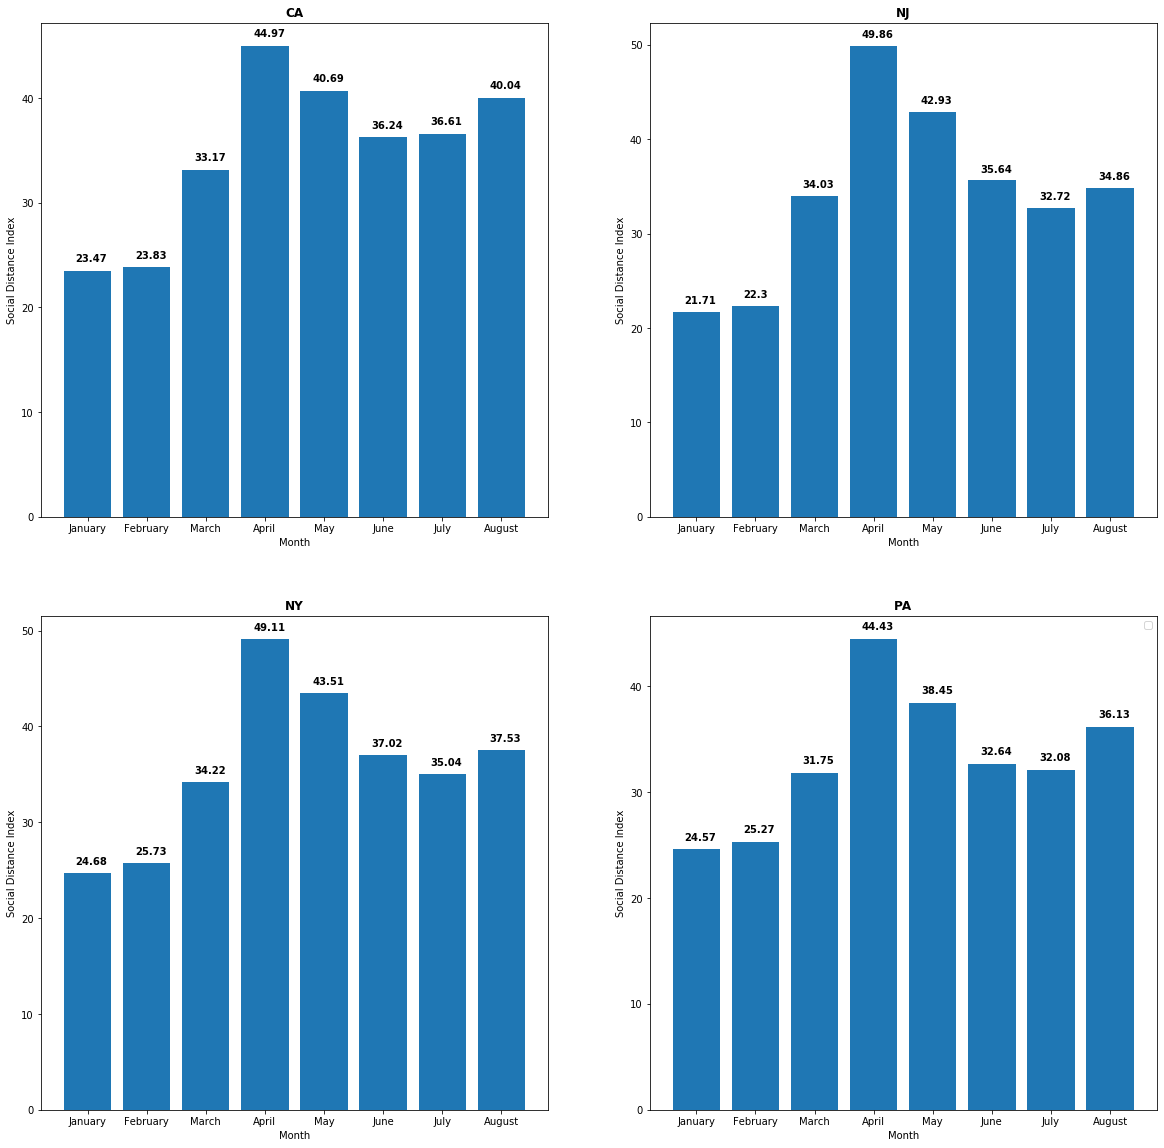

In [33]:
 import matplotlib.pyplot as plt
grouped = data[data["state"].isin(["PA","NY","CA","NJ"])].groupby(['month','state'])["sdi"].mean()
grouped = grouped.reset_index(["month","state"]).groupby("state")
ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    ax.bar(grouped.get_group(key)["month"],grouped.get_group(key)["sdi"])
    ax.set_title(key,fontweight='bold')
    for i, v in enumerate(grouped.get_group(key)["sdi"]):
        ax.text(i + 0.8,v + 0.9, str(round(v,2)), color='black', fontweight='bold')
        ax.set(xlabel='Month', ylabel='Social Distance Index')
        ax.set_xticklabels(["","January","February","March","April","May", "June", "July", "August"])

ax.legend()
plt.savefig("bar-plot.png")
plt.show()



No handles with labels found to put in legend.


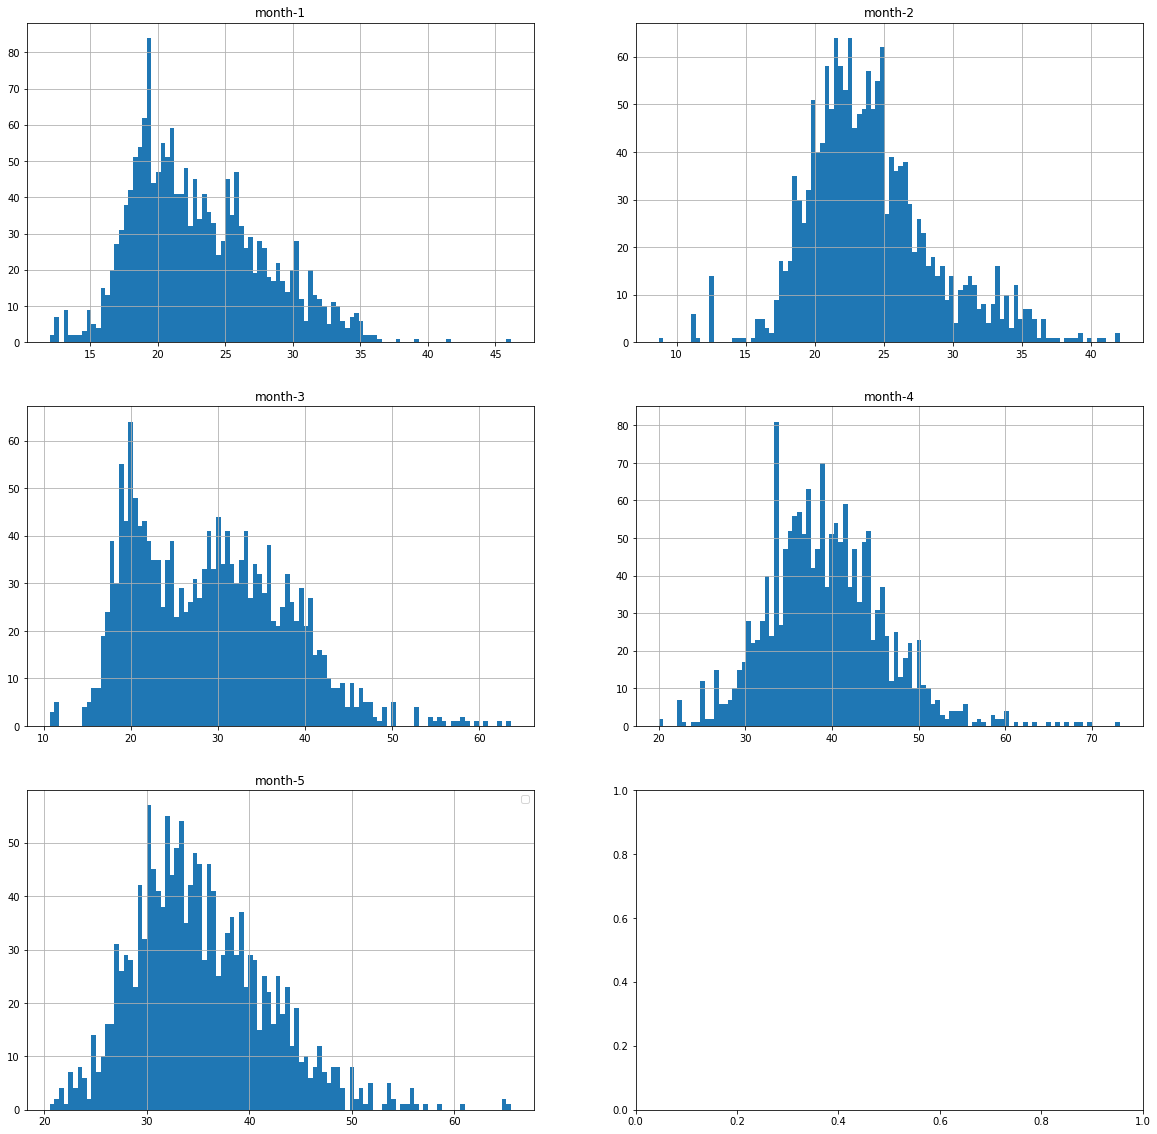

In [83]:
grouped = data.groupby('month')["sdi"]

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).hist(ax=ax, bins=100).set_title("month-" + str(key))

ax.legend()
plt.savefig("monthly-sdi-graphs.png")
plt.show()


No handles with labels found to put in legend.


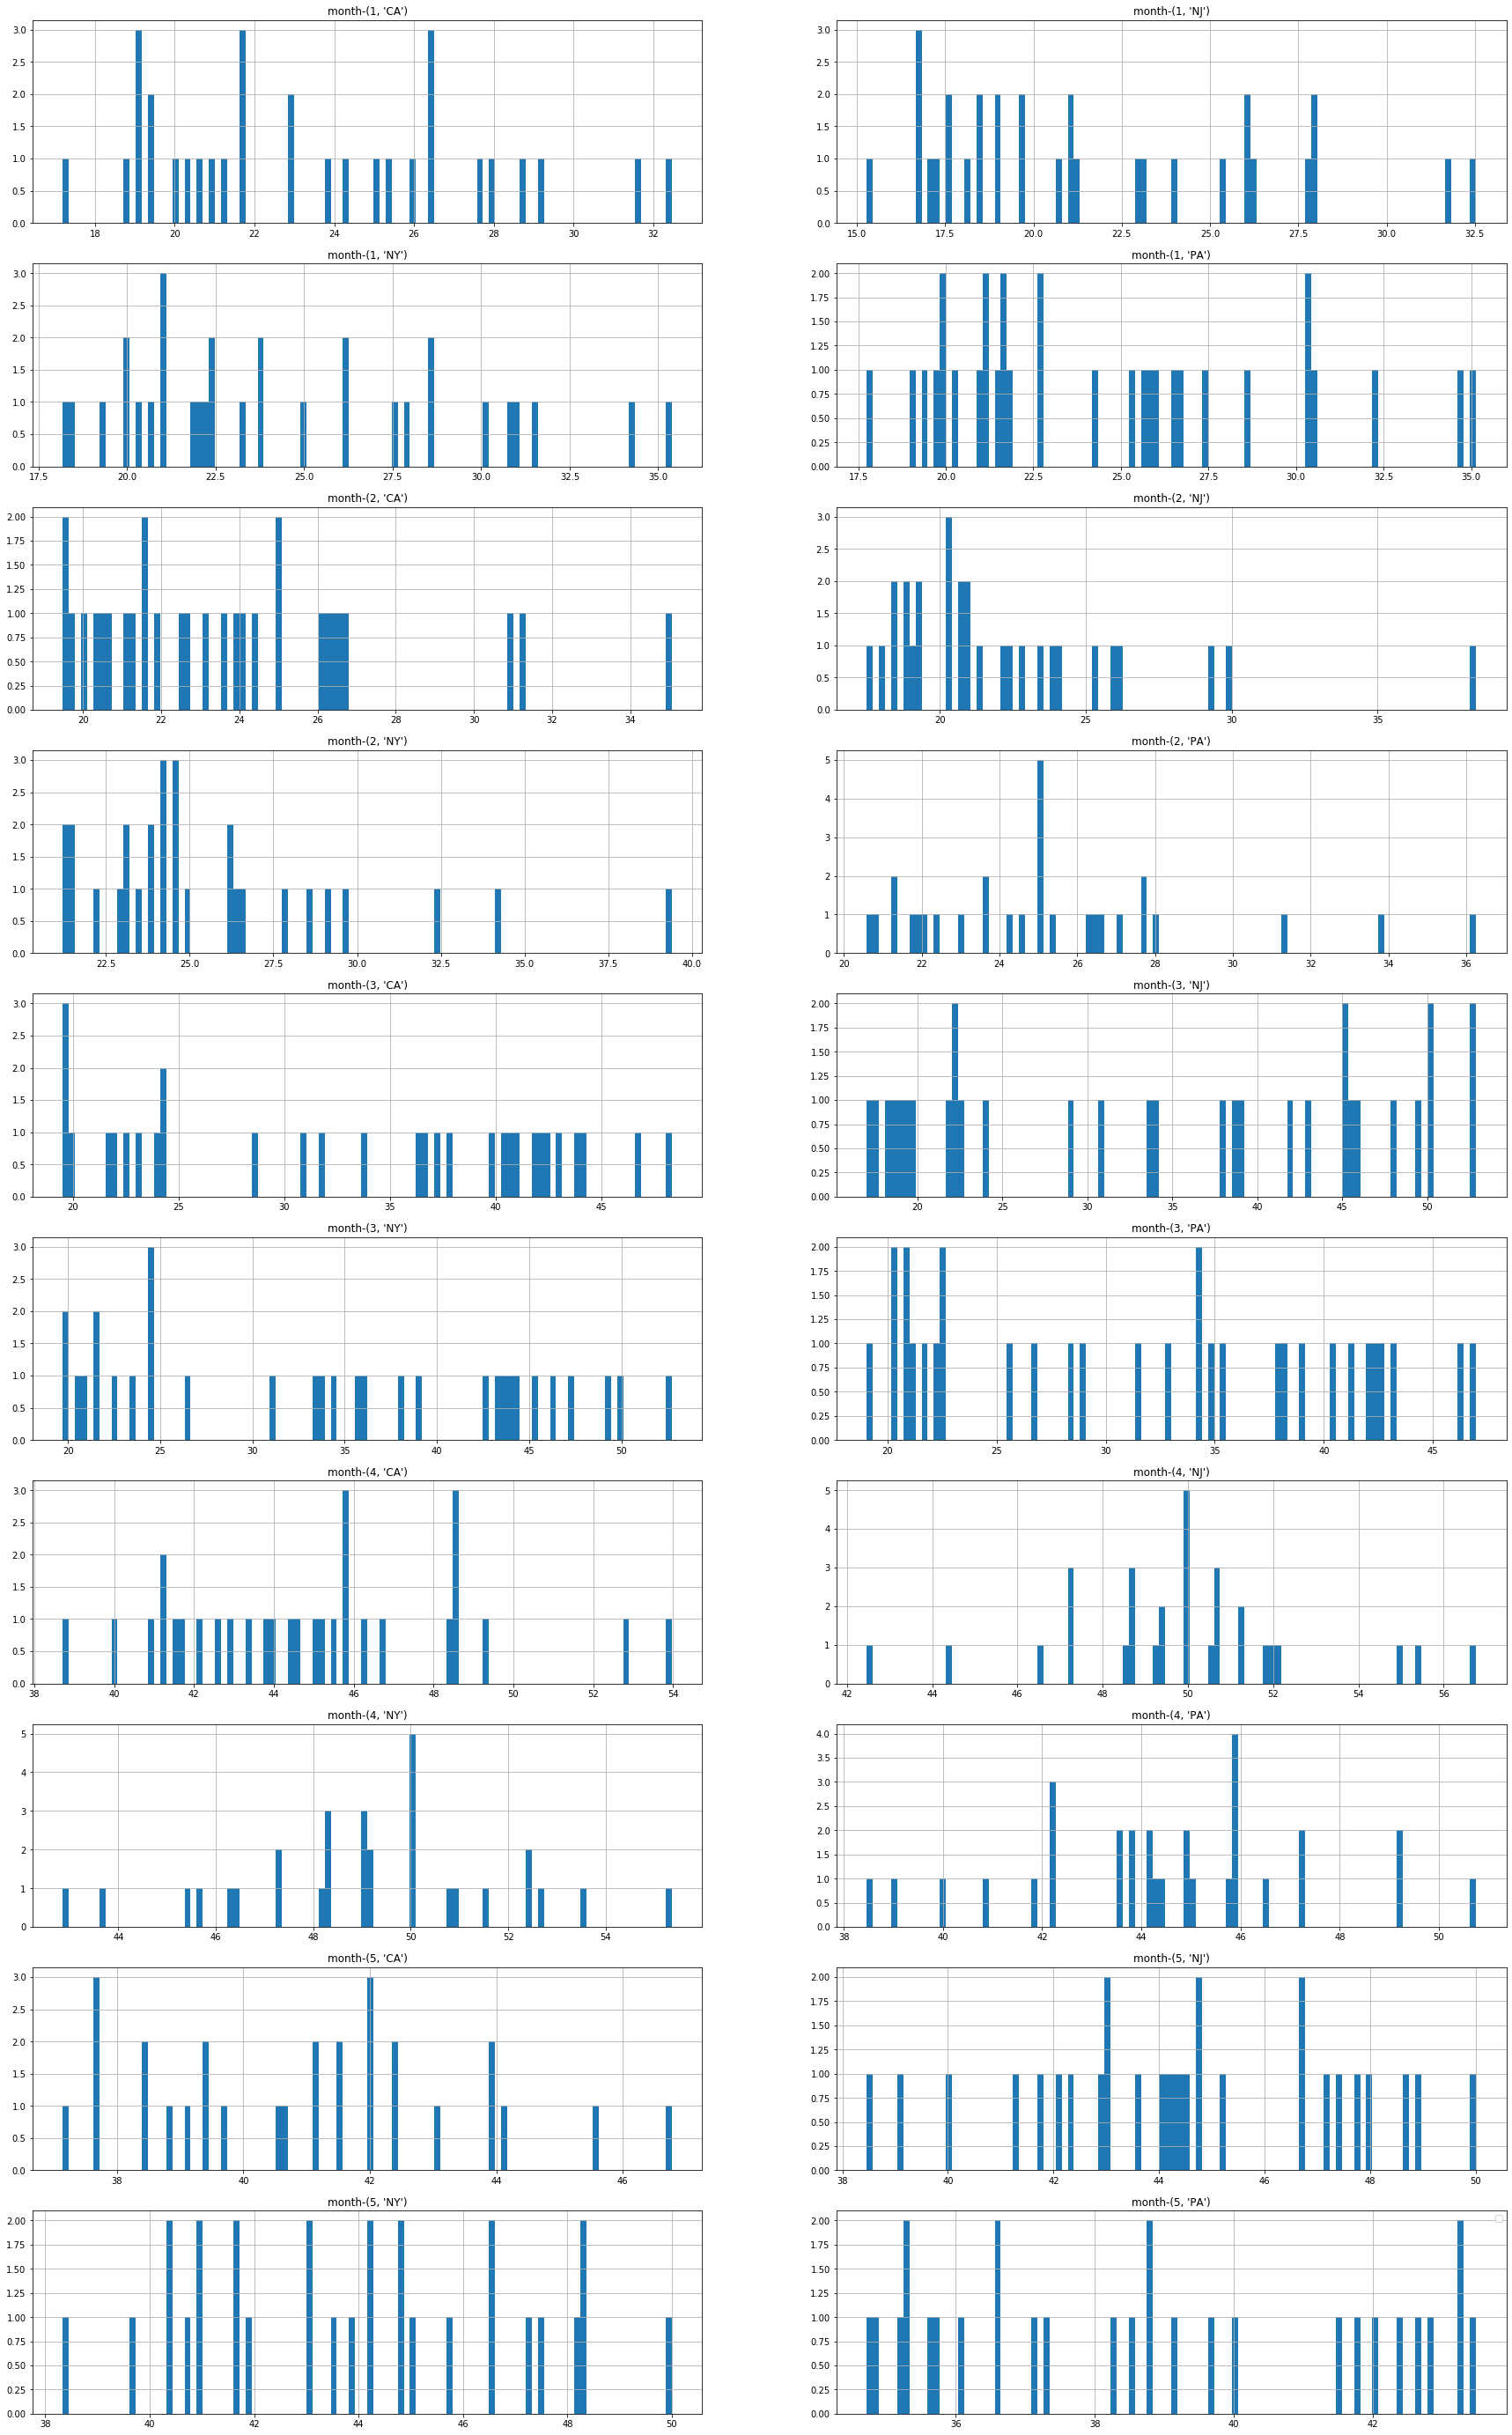

In [100]:
grouped = data[data["state"].isin(["PA","NY","CA","NJ"])].groupby(['month','state'])["sdi"]

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,50))

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).hist(ax=ax,bins=100).set_title("month-" + str(key))

ax.legend()
plt.savefig("monthly-statewise-sdi.png")
plt.show()

In [65]:

# import matplotlib.pyplot as plt


# plt.hist(sdi_list_outer_PA, bins = 100)
# plt.show()

In [264]:
d = pd.read_csv("data_preprocessed1//2020-01-01-social-distancing.csv")

In [265]:
d.columns

Index(['state', 'date_range_start', 'origin_census_block_group',
       'device_count', 'school_closure', 'unemployment_claims',
       'percent_of_state_labour_force', 'stay_home_orders',
       'distance_traveled_from_home', 'completely_home_device_count',
       'median_home_dwell_time', 'part_time_work_behavior_devices',
       'full_time_work_behavior_devices', 'delivery_behavior_devices',
       'median_non_home_dwell_time', 'candidate_device_count',
       'median_percentage_time_home', 'distance_traveled_from_home_diff',
       'median_home_dwell_time_diff', 'median_non_home_dwell_time_diff',
       'median_percentage_time_home_diff', 'distance_traveled_from_home_2019',
       'median_home_dwell_time_2019', 'median_non_home_dwell_time_2019',
       'median_percentage_time_home_2019'],
      dtype='object')

In [268]:
d   state school_closure date unemployment_claims percent_of_state_labour_force stay_home_orders

,state,date_range_start,origin_census_block_group,device_count,school_closure,unemployment_claims,percent_of_state_labour_force,stay_home_orders,distance_traveled_from_home,completely_home_device_count,...,candidate_device_count,median_percentage_time_home,distance_traveled_from_home_diff,median_home_dwell_time_diff,median_non_home_dwell_time_diff,median_percentage_time_home_diff,distance_traveled_from_home_2019,median_home_dwell_time_2019,median_non_home_dwell_time_2019,median_percentage_time_home_2019
0,AK,2020-01-01,1.515048e+11,87,0,110968,32,0,26358,26,...,151,83,2.452948e+04,70.221940,36.947368,-6.182625,1829.0,626.0,"0 48.0\nName: median_non_home_dwell_time, d...",90.0
1,AL,2020-01-01,1.075081e+10,128,0,547033,24,0,12448,36,...,203,85,9.796761e+03,129.837169,4.753860,2.227789,2652.0,672.0,"1 97.0\nName: median_non_home_dwell_time, d...",83.0
2,AR,2020-01-01,2.774332e+11,100,0,234723,17,0,12607,30,...,170,87,1.028478e+04,114.413907,11.221854,0.267266,2323.0,674.0,"2 68.0\nName: median_non_home_dwell_time, d...",87.0
3,AZ,2020-01-01,1.153313e+11,99,0,629770,17,0,12857,31,...,174,87,1.060213e+04,91.119741,28.784504,-4.582524,2255.0,696.0,"3 41.0\nName: median_non_home_dwell_time, d...",92.0
4,CA,2020-01-01,6.073883e+10,79,0,4879725,25,0,13099,25,...,157,85,1.107260e+04,-1.738879,24.911807,-5.207254,2027.0,714.0,"4 50.0\nName: median_non_home_dwell_time, d...",91.0
5,CO,2020-01-01,8.046198e+10,92,0,435778,13,0,16291,31,...,165,86,1.420706e+04,65.318953,26.686511,-5.088870,2084.0,675.0,"5 39.0\nName: median_non_home_dwell_time, d...",92.0
6,CT,2020-01-01,9.005959e+10,72,0,384705,19,0,12931,24,...,132,89,1.082356e+04,108.250970,7.999224,-0.518231,2108.0,688.0,"6 54.0\nName: median_non_home_dwell_time, d...",90.0
7,DC,2020-01-01,1.100101e+11,62,0,100739,24,0,27789,20,...,138,79,2.660125e+04,-53.681514,22.884187,-6.242762,1188.0,538.0,"7 57.0\nName: median_non_home_dwell_time, d...",86.0
8,DE,2020-01-01,1.000322e+11,98,0,104080,21,0,11439,34,...,180,89,9.083753e+03,87.980427,13.991103,-2.366548,2356.0,667.0,"8 38.0\nName: median_non_home_dwell_time, d...",92.0
9,FL,2020-01-01,1.207114e+11,124,0,2598125,24,0,12142,36,...,225,86,9.872360e+03,95.864116,25.067018,-2.206508,2270.0,668.0,"9 56.0\nName: median_non_home_dwell_time, d...",89.0
